In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [63]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [64]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


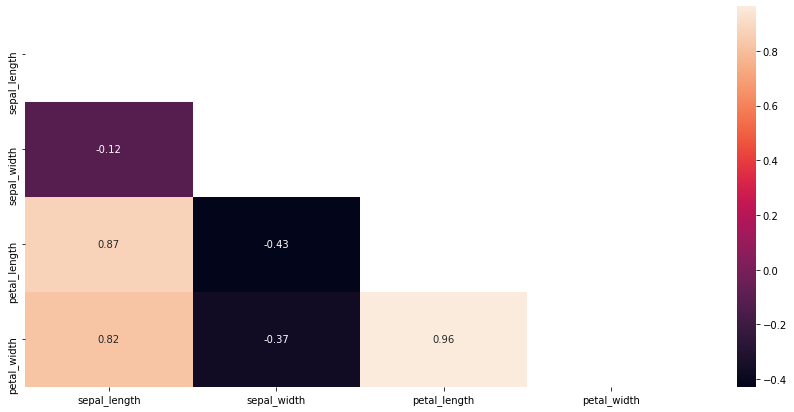

In [65]:
x = np.triu(df.corr())
plt.figure(figsize=(15,7))
sns.heatmap(data= df.corr(), mask=x, annot=True)
plt.show()

In [66]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [67]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


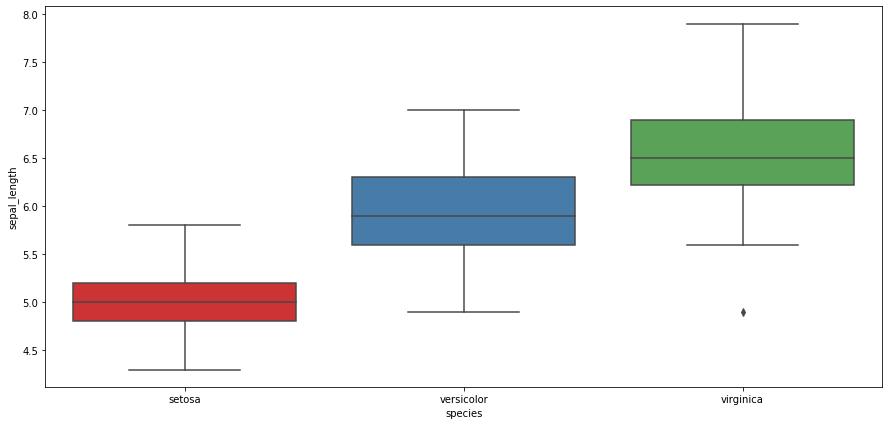

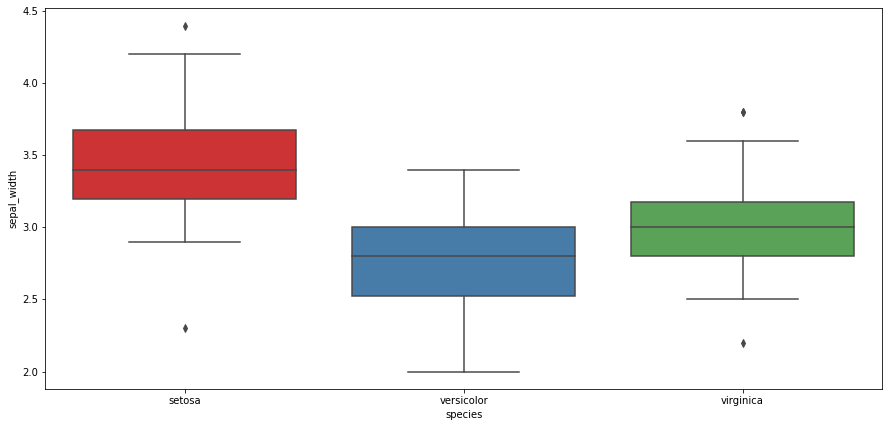

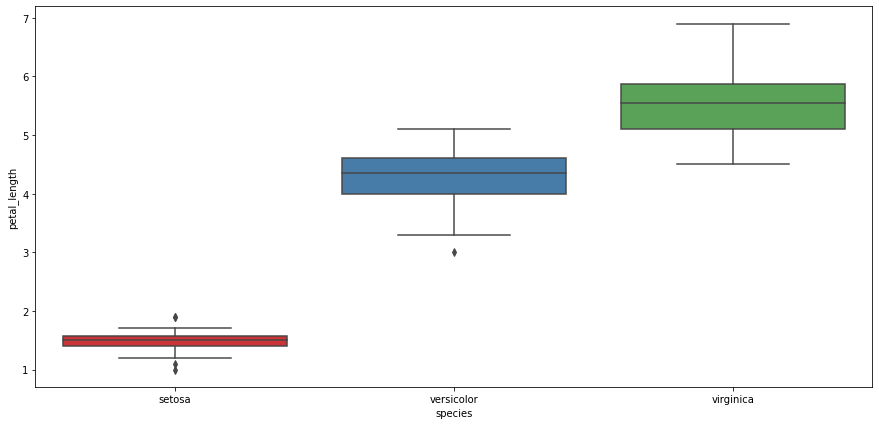

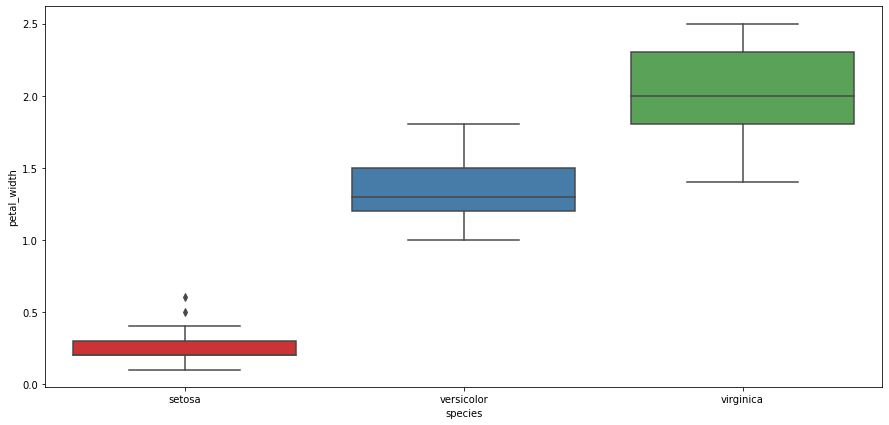

In [68]:
sns.set_palette('Set1')
for i in ['sepal_length','sepal_width','petal_length','petal_width']:
    plt.figure(figsize=(15,7))
    sns.boxplot(data=df, y=i, x='species')
    plt.show()

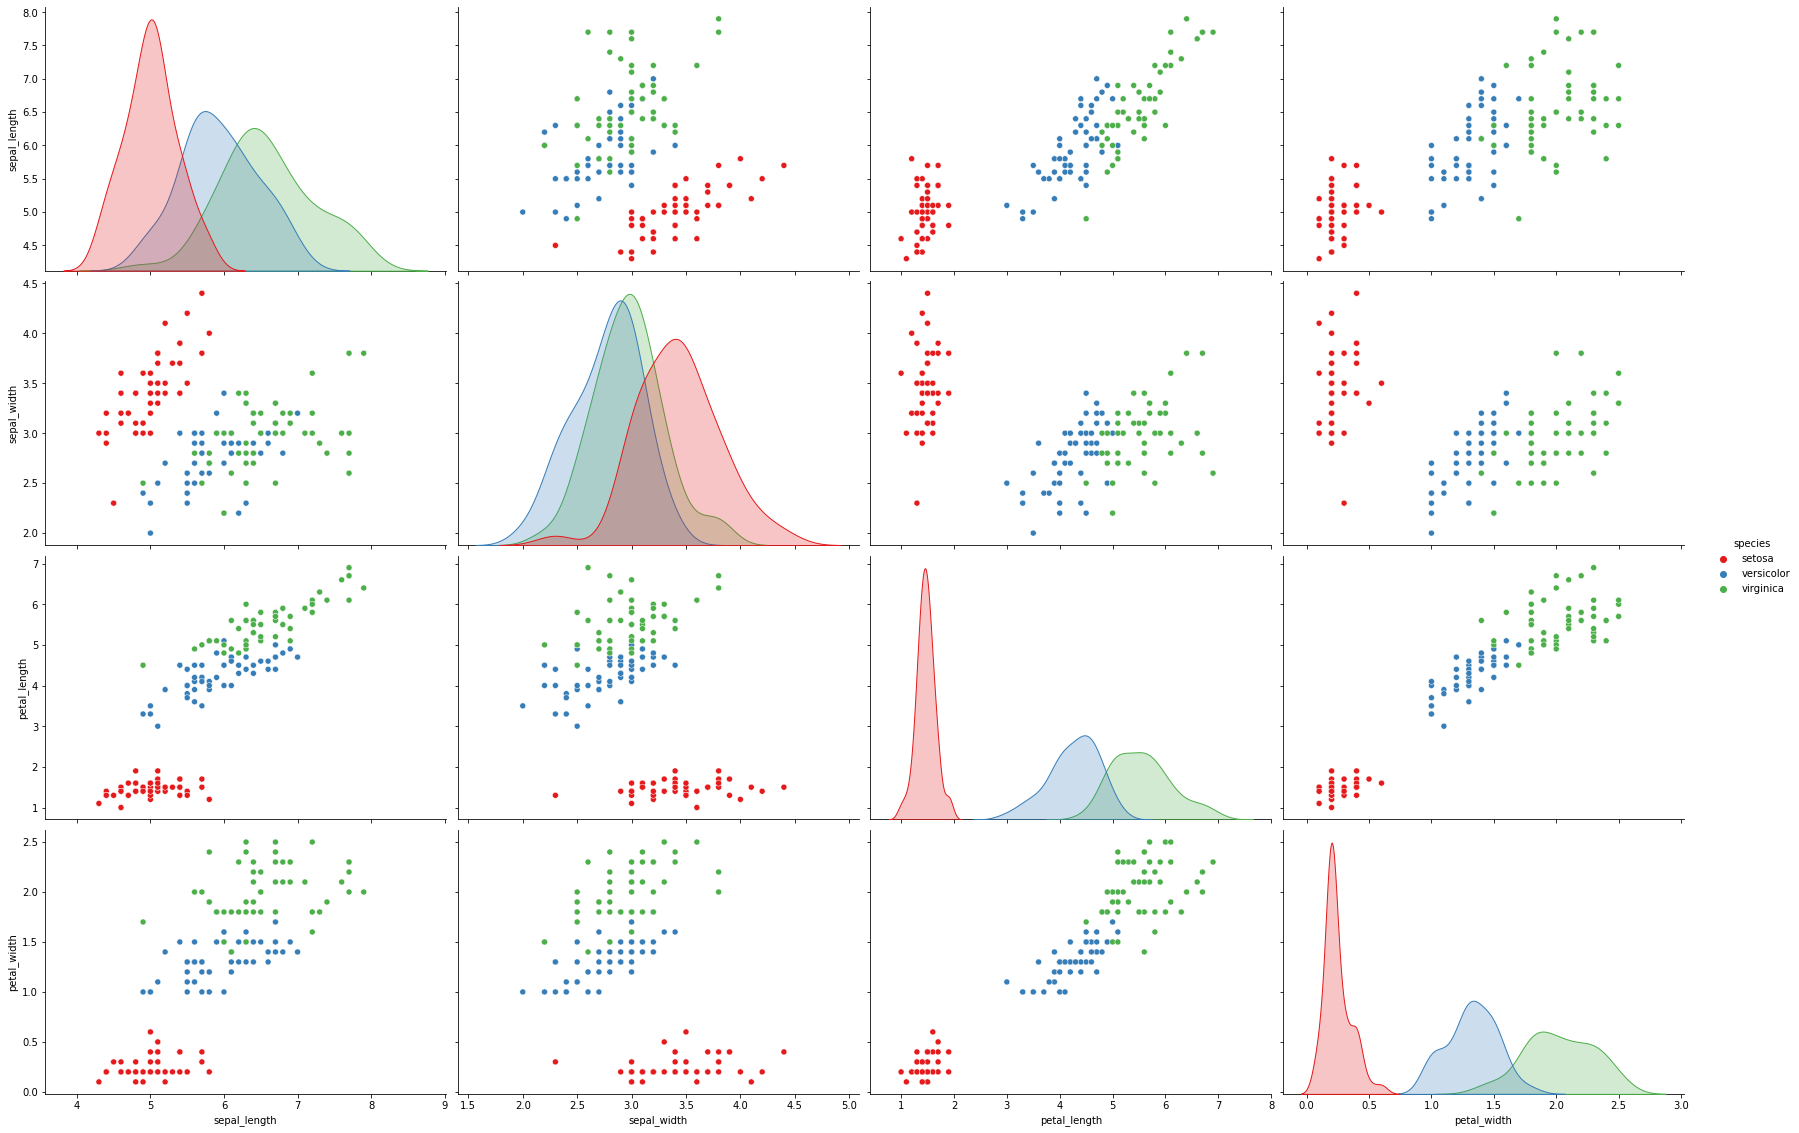

In [69]:
sns.pairplot(df, hue='species', height=4, aspect=1.5)

In [70]:
df['species'] = df['species'].map({'setosa' : 0, 'versicolor' : 1, 'virginica' : 2})
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
98,5.1,2.5,3.0,1.1,1
125,7.2,3.2,6.0,1.8,2
73,6.1,2.8,4.7,1.2,1
20,5.4,3.4,1.7,0.2,0


In [71]:
from sklearn.model_selection import train_test_split
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=0)


In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix
def model_predict(model, train_X, test_X, train_y, test_y):
    model.fit(train_X, train_y)
    pred = model.predict(test_X)
    conf_matrix = confusion_matrix(test_y, pred)
    print(f'Accuracy : {accuracy_score(pred, test_y)}')
    print('confusion matrix:\n',conf_matrix)
    return pred

In [112]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=150)
pred = model_predict(model, train_X, test_X, train_y, test_y)


Accuracy : 1.0
confusion matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [113]:
from sklearn.svm import SVC
model = SVC()
pred = model_predict(model, train_X, test_X, train_y, test_y)

Accuracy : 1.0
confusion matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [114]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
pred = model_predict(model, train_X, test_X, train_y, test_y)

Accuracy : 1.0
confusion matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [115]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
pred = model_predict(model, train_X, test_X, train_y, test_y)


Accuracy : 0.9666666666666667
confusion matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [116]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
pred = model_predict(model, train_X, test_X, train_y, test_y)


Accuracy : 0.9666666666666667
confusion matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [119]:
final_model = SVC()
final_model.fit(X,y)

SVC()

In [120]:
def prediction(value, model):
  pred = model.predict(value)
  names = []
  for i in pred:
    if i == 0:
      names.append('setosa')
    elif i == 1:
      names.append('versicolor')
    else:
      names.append('virginica')
  return names
values = [[5, 3, 1.5, 0.2],
          [6.2, 3, 4, 1.5],
            [6, 3.5, 5,2]]
a = prediction(values, final_model)
a


['setosa', 'versicolor', 'virginica']

list